# News, Trust, and Data Access

## Analysis

Here we will examine the dataset to attempt to answer the following questions:

1. How does the trust in the press differ between various demographics?
2. What news outlets are most trusted?

### Setup

The following cells import the dataset, format the DataFrame as ordered categorical values, and define some custom functions.

In [457]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

survey = pd.read_csv('news_trust_data__clean.csv')

print(survey.shape)
survey.head()

(11231, 13)


,RespondentID,political_lean,general_trust,pay_for_news,data_access,Trump_Approval,Age,Gender,Income,Region,Device,NewsSource,SourceTrust
0,6176264298,Moderate,Fair Amount,No,No change,Strongly disapprove,30-44,Male,"10,000-24,999",East South Central,iOS Phone/Tablet,NYT,1
1,6176263960,Moderate,Fair Amount,No,Increase Trust,Somewhat disapprove,18-29,Female,"0-9,999",Middle Atlantic,Windows Desktop/Laptop,NYT,1
2,6176258621,Liberal,Fair Amount,Yes,Increase Trust,Strongly disapprove,30-44,Male,"125,000-149,999",East North Central,Windows Desktop/Laptop,NYT,1
3,6176257082,Liberal,Fair Amount,No,Increase Trust,Strongly disapprove,18-29,Male,"125,000-149,999",Mountain,iOS Phone/Tablet,NYT,0
4,6176256111,Liberal,Fair Amount,Yes,No change,Strongly disapprove,30-44,Male,"10,000-24,999",Pacific,iOS Phone/Tablet,NYT,1


In [458]:
# Set all data as categorical
#survey = survey.astype('category')

# Preferred order of categories
order = {}
order['data_access'] = ['Decrease Trust', 'No change', 'Increase Trust']
order['general_trust'] = ['None at all', 'Not very much', 'Fair Amount', 'Great Amount']
order['Income'] = ['0-9,999', '10,000-24,999', '25,000-49,999', '50,000-74,999', '75,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-174,999', '175,000-199,999', '200,000+', 'Prefer not to answer']
order['Trump_Approval'] = ['Strongly disapprove', 'Somewhat disapprove', 'Somewhat approve', 'Strongly approve']
order['political_lean'] = ['Very Liberal', 'Liberal', 'Moderate', 'Conservative', 'Very Conservative']

# Set order for specified categories
for c in order.keys():
    survey[c] = pd.Categorical(survey[c], order[c])

# Check dtypes
#survey.info()

In [459]:
# Custom functions
def setup_heatmap(y, x, norm, color):
    '''
    setup_heatmap
    y: survey feature for y axis
    x: survey feature for x axis
    norm: normalize value [None, index, columns]
    color: color scheme for heatmap [GnBu]
    '''
    return sns.heatmap(pd.crosstab(survey[y], survey[x], normalize=norm), cmap=color)

## How does trust of the press differ between various demographics?

First, we will look at the overall survey results of trust in the press.

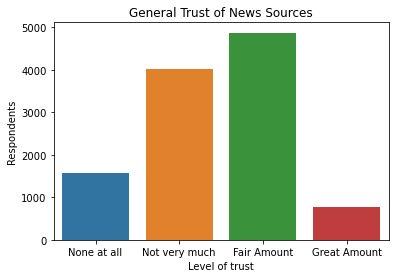

In [513]:
# Plot the LoT across all survey respondants
tot_trust = sns.countplot(x='general_trust', data=survey)
tot_trust.set(title='General Trust of News Sources', xlabel='Level of trust', ylabel='Respondents');
tot_trust;

Now, we will look for correlation between trust and various demographics by running Chi-Squared tests for each of the following groups:
* Age
* Gender
* Income
* Political leaning
* Pays for news source

In [514]:
print("Feature: P-value")
for f in ['Age', 'Gender', 'pay_for_news', 'Income', 'political_lean']:
    chi, p_val, dof, exp = chi2_contingency(pd.crosstab(survey['general_trust'], survey[f]))
    print(f)
    print(p_val, '\n')

Feature: P-value
Age
2.748067777580138e-22 

Gender
7.51659194485623e-28 

pay_for_news
4.4728334710084673e-44 

Income
2.26794372056191e-55 

political_lean
0.0 



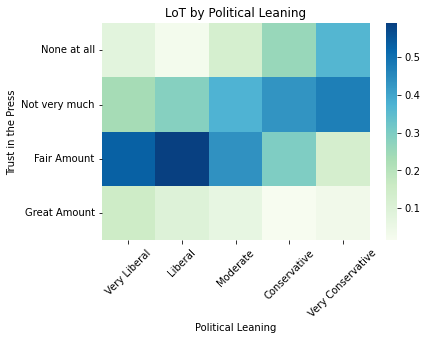

In [510]:
# Breakdown each political leaning by LoT (shading denotes % of political faction with given LoT)
pol_trust_heat = setup_heatmap('general_trust', 'political_lean', 'columns', 'GnBu')
pol_trust_heat.set(title='LoT by Political Leaning', xlabel='Political Leaning', ylabel='Trust in the Press')
plt.xticks(rotation=45)
pol_trust_heat;

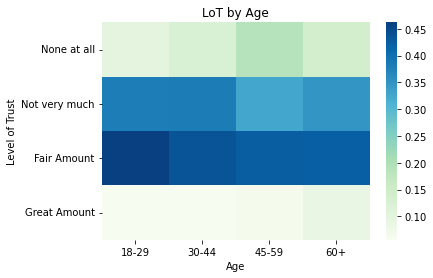

In [483]:
# LoT grouped by age
gender_LoT_heat = setup_heatmap('general_trust', 'Age', 'columns', 'GnBu')
gender_LoT_heat.set(title='LoT by Age', xlabel='Age', ylabel='Level of Trust')
gender_LoT_heat;

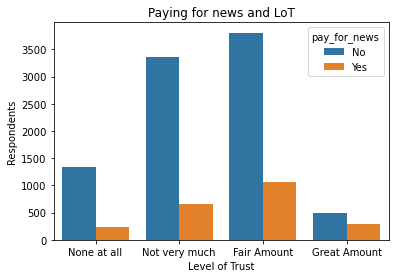

In [464]:
# How paying for a news source affects LoT
pay_LoT = sns.countplot(x='general_trust', hue='pay_for_news', data=survey);
pay_LoT.set(title='Paying for news and LoT', xlabel='Level of Trust', ylabel='Respondents')
pay_LoT;

## Individual News Sources

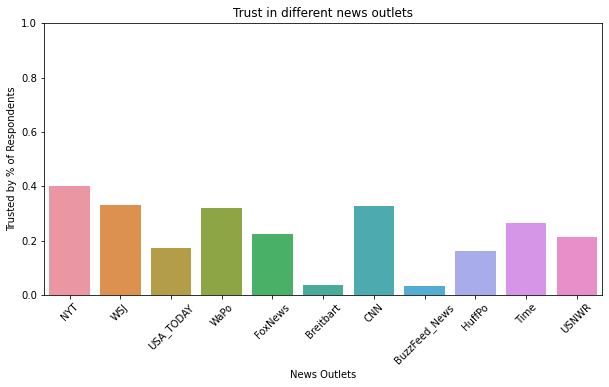

In [465]:
# Trust in individual news sources
plt.figure(figsize=(10,5))
plt.ylim((0, 1))
plt.xticks(rotation=45)
plot = sns.barplot(x=survey['NewsSource'], y=survey['SourceTrust'], ci=None)
plot.set(title='Trust in different news outlets', xlabel='News Outlets', ylabel='Trusted by % of Respondents')
plot;

In [466]:
pd.crosstab(survey['NewsSource'], survey['SourceTrust'], normalize='index')[1].sort_values(ascending=False)

NewsSource
NYT              0.401567
WSJ              0.330069
CNN              0.329089
WaPo             0.318315
Time             0.265426
FoxNews          0.224290
USNWR            0.213516
USA_TODAY        0.173359
HuffPo           0.162586
Breitbart        0.037218
BuzzFeed_News    0.034280
Name: 1, dtype: float64

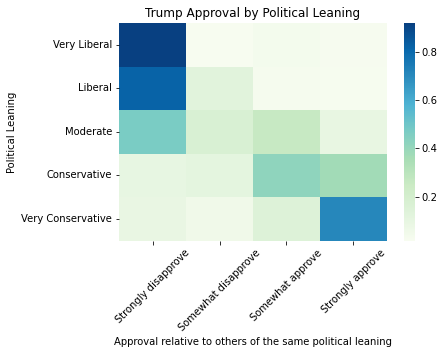

In [467]:
# Trump Approval, relative to each political leaning
approval_heat = setup_heatmap('political_lean', 'Trump_Approval', 'index', 'GnBu')
approval_heat.set(title='Trump Approval by Political Leaning', xlabel='Approval relative to others of the same political leaning', ylabel='Political Leaning')
plt.xticks(rotation=45)
approval_heat;

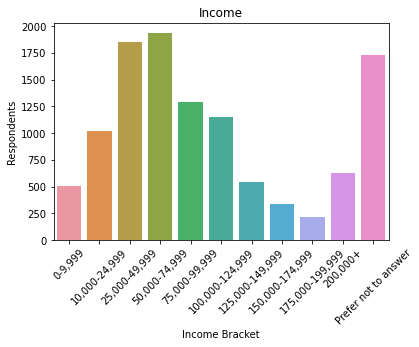

In [468]:


#plt.figure(figsize=(15,8))
income_plt = sns.countplot(x="Income", data=survey)
income_plt.set(title='Income', xlabel='Income Bracket', ylabel='Respondents')
plt.xticks(rotation=45)
income_plt;